<a href="https://colab.research.google.com/github/hunubul/Sirtet/blob/master/ANN_seg_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import tensorflow as tf
import numpy as np
import pickle as pkl
import cv2
from sklearn.manifold import TSNE
import urllib
import random
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import ops

In [0]:
!wget http://users.itk.ppke.hu/~horan/ANN/08_segmentation/clevr_types_images.zip
!unzip clevr_types_images.zip

--2019-05-09 06:34:24--  http://users.itk.ppke.hu/~horan/ANN/08_segmentation/clevr_types_images.zip
Resolving users.itk.ppke.hu (users.itk.ppke.hu)... 193.225.109.33
Connecting to users.itk.ppke.hu (users.itk.ppke.hu)|193.225.109.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172204388 (164M) [application/zip]
Saving to: ‘clevr_types_images.zip’

clevr_types_images. 100%[===================>] 164.23M   574KB/s    in 4m 21s  

2019-05-09 06:38:45 (645 KB/s) - ‘clevr_types_images.zip’ saved [172204388/172204388]

Archive:  clevr_types_images.zip
   creating: images/
  inflating: images/all_objects000499.png  
  inflating: images/CLEVR_view_000489.png  
  inflating: images/all_objects000300.png  
  inflating: images/CLEVR_view_000462.png  
  inflating: images/CLEVR_view_000304.png  
  inflating: images/all_objects000466.png  
  inflating: images/CLEVR_view_000310.png  
  inflating: images/all_objects000472.png  
  inflating: images/all_objects000314.png  
  in

In [0]:
TrainNum=1500
ImgShape=[240,320,3]
trainimages=np.zeros([TrainNum]+ImgShape)
trainmasks=np.zeros([TrainNum]+ImgShape)

for num in range(TrainNum):
  trainmasks[num,:,:,:]=cv2.resize(cv2.imread("images/all_objects"+str(num).zfill(6)+".png"),(ImgShape[1],ImgShape[0]))
  trainimages[num,:,:,:]=cv2.resize(cv2.imread("images/CLEVR_view_"+str(num).zfill(6)+".png"),(ImgShape[1],ImgShape[0]))

np.save("trainimages.npy",trainimages)
np.save("trainmasks.npy",trainmasks)

TestNum=200
testimages=np.zeros([TestNum]+ImgShape)
testmasks=np.zeros([TestNum]+ImgShape)

for num in range(TrainNum,TrainNum+TestNum):
  testmasks[num-TrainNum,:,:,:]=cv2.resize(cv2.imread("images/all_objects"+str(num).zfill(6)+".png"),(ImgShape[1],ImgShape[0]))
  testimages[num-TrainNum,:,:,:]=cv2.resize(cv2.imread("images/CLEVR_view_"+str(num).zfill(6)+".png"),(ImgShape[1],ImgShape[0]))
np.save("testimages.npy",testimages)
np.save("testmasks.npy",testmasks)


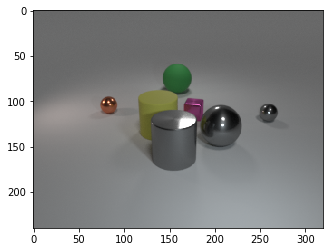

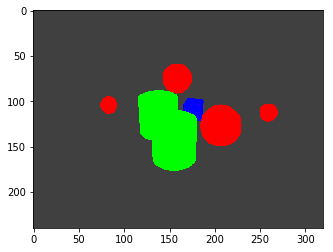

In [0]:
plt.imshow(trainimages[6,:,:,:].astype(np.uint8))
plt.figure()
plt.imshow(trainmasks[6,:,:,:].astype(np.uint8))
plt.show()